In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


train = pd.read_csv('COMP4433 Project/train.csv')
test = pd.read_csv('COMP4433 Project/test.csv')

In [2]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [3]:
train['SalePrice'].describe()


count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

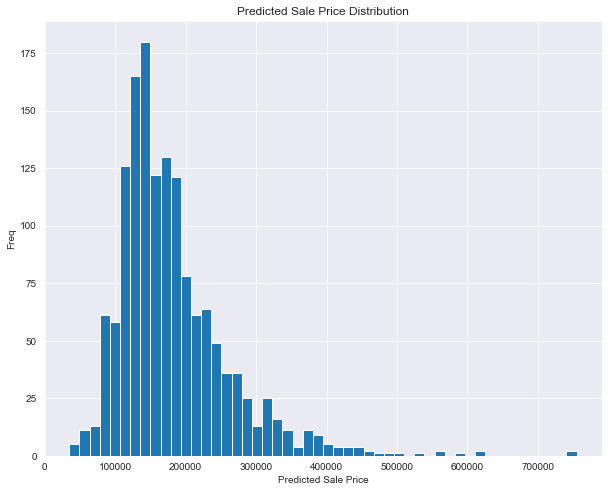

In [4]:
plt.figure(figsize=(10,8))
plt.hist(train['SalePrice'], bins=50)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Freq')
plt.title('Predicted Sale Price Distribution')

plt.show()

## Data Preprocessing

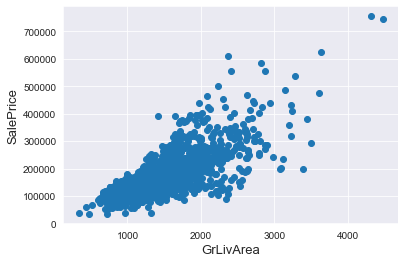

(2917, 80)

In [5]:




#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

all_data = pd.concat((train, test),sort=True).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)



all_data.shape

In [6]:

# 1 refer to axis=1 (column)
all_data = all_data.drop('Id', 1)

In [7]:

numeric_features = all_data.select_dtypes(include=[np.number])
print(numeric_features.columns)
len(numeric_features.columns)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')


36

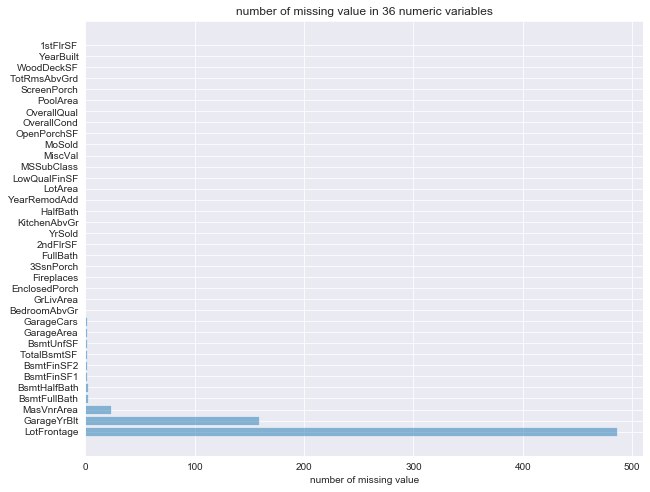

In [8]:
nulls = pd.DataFrame(numeric_features.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'

y_pos = np.arange(len(nulls))

plt.figure(figsize=(10,8))
plt.barh(y_pos, nulls['Null Count'], align='center', alpha=0.5)
plt.yticks(y_pos, nulls.index)
plt.xlabel('number of missing value')
plt.title('number of missing value in 36 numeric variables')

plt.show()

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(numeric_features)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, tol=0.001, verbose=0)

In [94]:
numeric_features_filled = imp.transform(numeric_features)
# convert numpy array to dataframe
numeric_features_filled = pd.DataFrame(data = numeric_features_filled,columns = numeric_features.columns)

numeric_features_filled.isnull().sum()

(2917, 36)


In [11]:
categorical_features = all_data.select_dtypes(exclude=[np.number])
print(categorical_features.columns)
len(categorical_features.columns)

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')


43

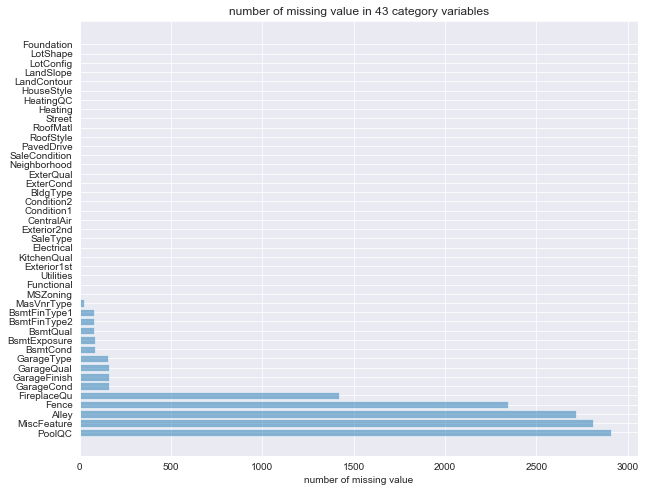

In [12]:

nulls = pd.DataFrame(categorical_features.isnull().sum().sort_values(ascending=False))
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'

y_pos = np.arange(len(nulls))

plt.figure(figsize=(10,8))
plt.barh(y_pos, nulls['Null Count'], align='center', alpha=0.5)
plt.yticks(y_pos, nulls.index)
plt.xlabel('number of missing value')
plt.title('number of missing value in 43 category variables')

plt.show()

In [13]:
# make a copy
categorical_features_filled = categorical_features.copy()

In [14]:
categorical_features_filled["PoolQC"] = categorical_features_filled["PoolQC"].fillna("None")
categorical_features_filled["MiscFeature"] = categorical_features_filled["MiscFeature"].fillna("None")
categorical_features_filled["Alley"] = categorical_features_filled["Alley"].fillna("None")
categorical_features_filled["Fence"] = categorical_features_filled["Fence"].fillna("None")
categorical_features_filled["FireplaceQu"] = categorical_features_filled["FireplaceQu"].fillna("None")

In [15]:
categorical_features_filled = categorical_features_filled.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [16]:
categorical_features_filled.isnull().sum()


Alley            0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtQual         0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Foundation       0
Functional       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenQual      0
LandContour      0
LandSlope        0
LotConfig        0
LotShape         0
MSZoning         0
MasVnrType       0
MiscFeature      0
Neighborhood     0
PavedDrive       0
PoolQC           0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType         0
Street           0
Utilities        0
dtype: int64

In [97]:
skewed_feats = numeric_features_filled.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)



skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    numeric_features_filled_box = boxcox1p(numeric_features_filled, lam)

print(numeric_features_filled.head(5))
print(numeric_features_filled_box.head(5))



Skew in numerical features: 

There are 36 skewed numerical features to Box Cox transform
   1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0   856.000   854.000      0.000         3.000     706.000       0.000   
1  1262.000     0.000      0.000         3.000     978.000       0.000   
2   920.000   866.000      0.000         3.000     486.000       0.000   
3   961.000   756.000      0.000         3.000     216.000       0.000   
4  1145.000  1053.000      0.000         4.000     655.000       0.000   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  OverallCond  \
0         1.000         0.000    150.000          0.000  ...        5.000   
1         0.000         1.000    284.000          0.000  ...        8.000   
2         1.000         0.000    434.000          0.000  ...        5.000   
3         1.000         0.000    540.000        272.000  ...        5.000   
4         1.000         0.000    490.000          0.000  ...        5.000   

 

## 3. Feature Engineering

In [43]:
from sklearn.preprocessing import OneHotEncoder

# convert to string
categorical_features_filled = categorical_features_filled.apply(lambda x:x.astype(str))

# Create the encoder.
onehot = pd.get_dummies(categorical_features_filled,drop_first=True)

onehot.head(3)

,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [98]:
all_data_processed = pd.concat([numeric_features_filled_box, onehot], axis=1)
all_data_processed.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,11.693,11.686,0.000,1.541,11.170,0.000,0.730,0.000,7.483,0.000,...,0,0,0,0,0,0,0,1,1,0
1,12.792,0.000,0.000,1.541,12.063,0.000,0.000,0.730,8.898,0.000,...,0,0,0,0,0,0,0,1,1,0
2,11.892,11.725,0.000,1.541,10.200,0.000,0.730,0.000,9.917,0.000,...,0,0,0,0,0,0,0,1,1,0
3,12.014,11.354,0.000,1.541,8.274,0.000,0.730,0.000,10.468,8.798,...,0,0,0,0,0,0,0,1,1,0
4,12.511,12.271,0.000,1.820,10.971,0.000,0.730,0.000,10.221,0.000,...,0,0,0,0,0,0,0,1,1,0


In [100]:
train_processed = all_data_processed[:ntrain]
test_processed = all_data_processed[ntrain:]

## Modelling

fit(train_processed, y_train)
<br>
predict(test_processed)

In [102]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from joblib import dump, load
k_fold = model_selection.KFold(n_splits=5, random_state=123)
X = train_processed
Y = y_train

In [103]:
from sklearn.ensemble import RandomForestRegressor




In [186]:
max_features = [i*0.1 for i in range(5, 7, 1)]
max_depth = [i for i in range(2, 5)]
max_leaf_nodes = [i for i in range(20, 70, 20)]
n_estimators = [i for i in range(700, 1300, 300)]

print(max_features)
print(max_depth)
print(max_leaf_nodes)
print(n_estimators)

[0.5, 0.6000000000000001]
[2, 3, 4]
[20, 40, 60]
[700, 1000]


In [ ]:
# Check if object exist
try:
    load('RF.joblib') 
except FileNotFoundError:
    print("The model is not exist, now create & save model")
    
    from sklearn.ensemble import RandomForestRegressor

    
    rf_grid = {'max_features': max_features, 'max_depth': max_depth,
              'max_leaf_nodes': max_leaf_nodes, 'n_estimators': n_estimators}
    rf_model = GridSearchCV( RandomForestRegressor(),
                             rf_grid, cv=k_fold, scoring='neg_mean_squared_log_error',
                             return_train_score=True, n_jobs=-1)
    rf_model.fit(X,Y)
    # Save model in current folder 
    dump(rf_model, 'RF.joblib')
else:
    rf_model = load('RF.joblib')
    print("Reload existing model")

print('------------------------------------------------------------')
print('Model Summary:')
print(rf_model.fit)

The model is not exist, now create & save model


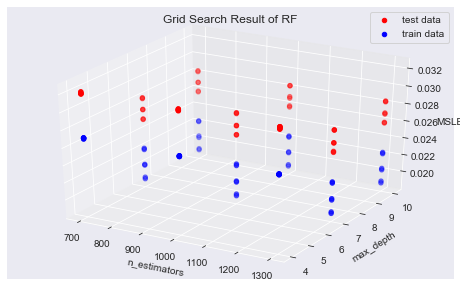

In [177]:
X_axis = rf_model.cv_results_['param_n_estimators'].data
Y_axis = rf_model.cv_results_['param_max_depth'].data
test_axis = abs(rf_model.cv_results_['mean_test_score'])
train_axis= abs(rf_model.cv_results_['mean_train_score'])

plt.figure(figsize=(8,5))
ax = plt.axes(projection='3d')
ax.scatter(X_axis, Y_axis, test_axis, c='red', label='test data')
ax.scatter(X_axis, Y_axis, train_axis, c='blue', label='train data')

plt.title('Grid Search Result of RF')
ax.set_xlabel('n_estimators')
ax.set_ylabel('max_depth')
ax.set_zlabel('MSLE')
ax.legend();

In [178]:
print(test_axis)

[0.03191368 0.03190574 0.03181693 0.03193149 0.03200588 0.03185003
 0.03194691 0.03196714 0.03193384 0.03199537 0.03210774 0.03207194
 0.03212919 0.032092   0.03207589 0.03215038 0.03198319 0.03201112
 0.02827004 0.02848992 0.02843739 0.02697855 0.0270464  0.02697443
 0.02590891 0.02598584 0.02589133 0.02837014 0.02839139 0.02840907
 0.02702964 0.0269929  0.02696733 0.02584772 0.02594017 0.02600469
 0.02833529 0.02846381 0.02839143 0.02705439 0.02700153 0.02698262
 0.02593452 0.02595275 0.02593692 0.02844828 0.02842843 0.02847656
 0.0270876  0.02717219 0.02709907 0.02603761 0.02608654 0.02601576]


In [180]:
print('MSLE in:')
print('Test Data:',abs(rf_model.cv_results_['mean_test_score'][rf_model.best_index_]))
print('Train Data:',abs(rf_model.cv_results_['mean_train_score'][rf_model.best_index_]))
print('------------------------------------------------------------')
print('Parameters:')
print('max_features:',rf_model.cv_results_['param_max_features'][rf_model.best_index_])
print('param_max_depth:',rf_model.cv_results_['param_max_depth'][rf_model.best_index_])
print('max_leaf_nodes:',rf_model.cv_results_['param_max_leaf_nodes'][rf_model.best_index_])
print('param_n_estimators:',rf_model.cv_results_['param_n_estimators'][rf_model.best_index_])

MSLE in:
Test Data: 0.02584772468125247
Train Data: 0.018745570727987434
------------------------------------------------------------
Parameters:
max_features: 0.6000000000000001
param_max_depth: 7
max_leaf_nodes: 30
param_n_estimators: 700


In [167]:
rf_model.cv_results_

{'mean_fit_time': array([ 7.31166544,  9.38367443,  9.78109484,  6.788831  ,  8.26417532,
         9.96477947,  6.81717963,  8.13413086,  9.72625947,  7.88708196,
         9.71763258, 11.42512803,  8.46720786,  9.85675321, 11.29382277,
         8.3894454 ,  9.52798743, 11.48105006,  8.6755538 , 10.3226685 ,
        12.14131508,  9.30224442, 11.18481512, 12.84492927,  9.80526919,
        11.92788606, 13.77339334, 10.12623172, 11.55343161, 13.58501029,
        10.58846836, 12.52379241, 14.26849384, 10.8865272 , 13.44602075,
        15.95632448,  8.5180594 , 10.39014139, 12.53903899,  9.72219157,
        11.60790467, 14.090558  , 10.57521515, 12.51544442, 14.20467172,
         9.97701597, 12.05137253, 14.04823871, 10.8583406 , 13.00957069,
        15.29580379, 11.64889393, 13.77038941, 14.69028516]),
 'std_fit_time': array([0.32522462, 0.30941096, 0.21557947, 0.3476891 , 0.29136916,
        0.12762036, 0.12486173, 0.15283356, 0.15468154, 0.15861424,
        0.24403233, 0.26393713, 0.34571

            featuresName  featureImportannces
27           OverallQual                0.405
15             GrLivArea                0.138
13            GarageCars                0.108
87          ExterQual_TA                0.055
31           TotalBsmtSF                0.050
0               1stFlrSF                0.039
33             YearBuilt                0.032
12            GarageArea                0.029
4             BsmtFinSF1                0.024
1               2ndFlrSF                0.018
11              FullBath                0.015
30          TotRmsAbvGrd                0.012
18               LotArea                0.009
142     GarageFinish_Unf                0.007
34          YearRemodAdd                0.005
19           LotFrontage                0.004
86          ExterQual_Gd                0.004
22            MasVnrArea                0.004
10            Fireplaces                0.004
123     FireplaceQu_None                0.004
170       KitchenQual_TA          

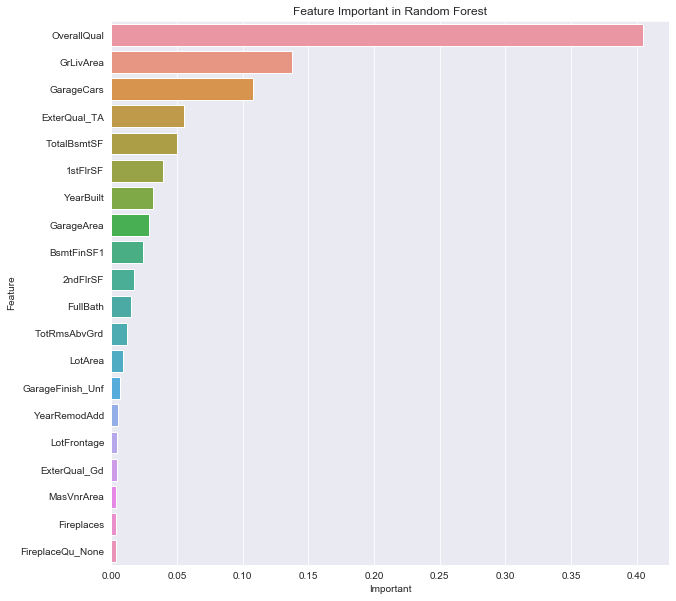

In [168]:
plt.figure(figsize=(10,10))

d = {'featuresName': X.columns, 'featureImportannces': rf_model.best_estimator_.feature_importances_}
temp = pd.DataFrame(data=d)
temp = temp.sort_values(by=['featureImportannces'],ascending=False)

print(temp)
newtemp = temp[0:20]
print(newtemp)

sns.barplot(y=newtemp['featuresName'],x=newtemp['featureImportannces'])

plt.title('Feature Important in Random Forest')
plt.xlabel('Important')
plt.ylabel('Feature');

In [169]:
y_pred = rf_model.predict(test_processed)

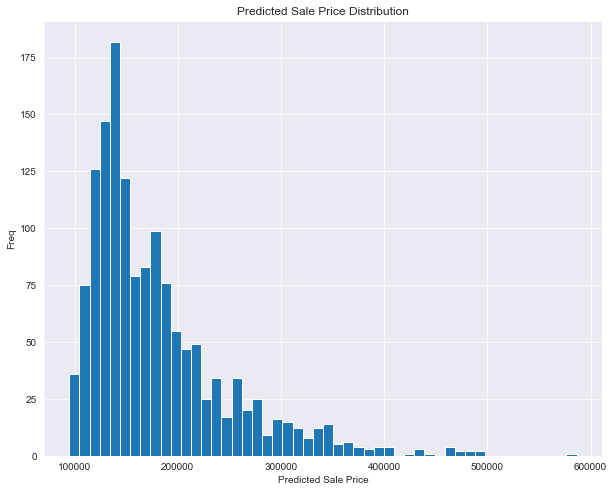

In [170]:
plt.figure(figsize=(10,8))
plt.hist(y_pred, bins=50)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Freq')
plt.title('Predicted Sale Price Distribution')

plt.show()


In [171]:
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = y_pred
sub.to_csv('RF-new.csv',index=False)